In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

In [207]:
df = pd.read_csv("/kaggle/input/temperature-moisture/adjusted_temperature_moisture_dataset.csv")

In [208]:
df.head()

,Timestamp,Temperature (°C),Moisture (%)
0,2024-01-01 00:00:00,20.496714,37.658305
1,2024-01-01 00:15:00,19.861736,35.393042
2,2024-01-01 00:30:00,20.647689,36.418008
3,2024-01-01 00:45:00,21.523030,34.820529
4,2024-01-01 01:00:00,20.106588,37.539493


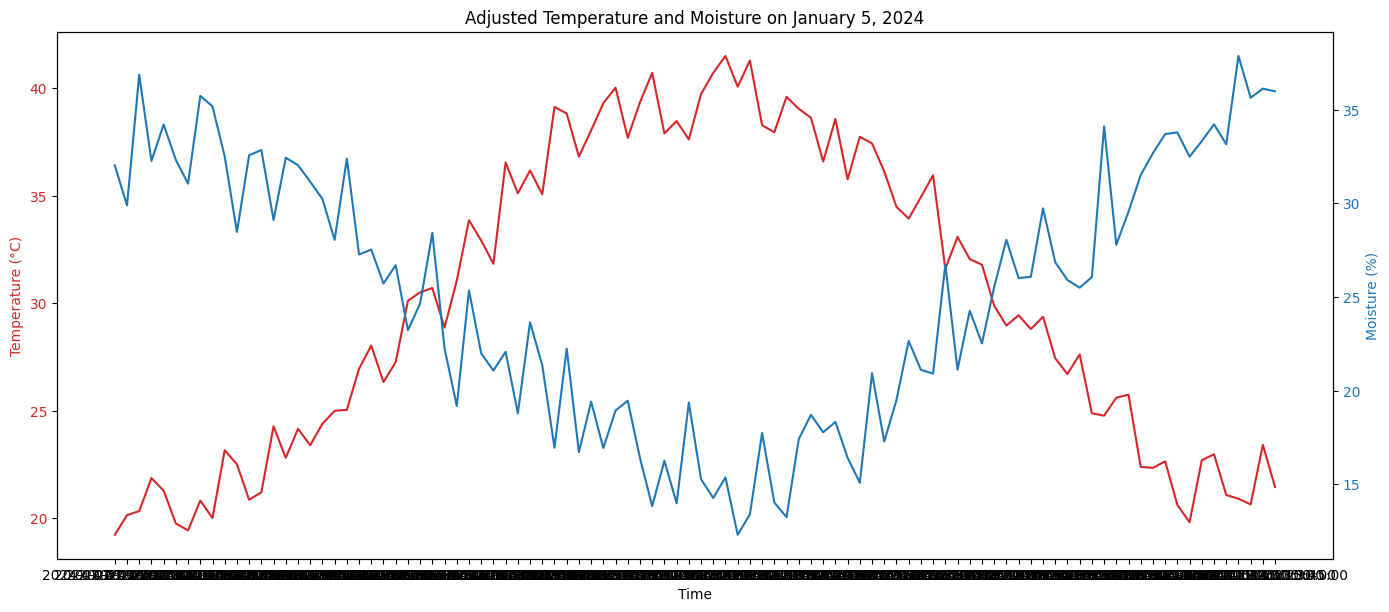

In [209]:
# Selecting a single day's data from the adjusted dataset for visualization
adjusted_day_data = df[(df['Timestamp'] >= '2024-01-05') & (df['Timestamp'] < '2024-01-06')]

# Plotting the adjusted data
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(adjusted_day_data['Timestamp'], adjusted_day_data['Temperature (°C)'], color=color, label='Temperature (°C)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Moisture (%)', color=color)
ax2.plot(adjusted_day_data['Timestamp'], adjusted_day_data['Moisture (%)'], color=color, label='Moisture (%)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Adjusted Temperature and Moisture on January 5, 2024')
plt.show()


In [210]:
df.columns.tolist()

['Timestamp', 'Temperature (°C)', 'Moisture (%)']

In [211]:
# Read in the Data
def readData(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour
    df['Minute'] = df['Timestamp'].dt.minute

    # New Features (X) will consist of these time components
    X = df[['Year', 'Month', 'Day', 'Hour', 'Minute']].values

    Y = df[['Temperature (°C)', 'Moisture (%)']].values
    return X,Y

In [212]:
# Create Sequences
def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)

In [213]:
X,Y = readData(df)
print("X: ", X.shape)
print("Y: ", Y.shape)

time_steps = 96  # Use a full day as last datapoints
X_seq, Y_seq = create_sequences(X, Y, time_steps)

X:  (961, 5)
Y:  (961, 2)


In [214]:
tf.random.set_seed(69) 
model = Sequential([
    tf.keras.Input(shape=(time_steps, X_seq.shape[2])),
    LSTM(50),
    Dense(Y.shape[1])
    ])

model.compile(optimizer='adam', loss='mean_squared_error')


split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
Y_train, Y_test = Y_seq[:split], Y_seq[split:]

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))


predictions = model.predict(X_test)
print(predictions)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 780.2458 - val_loss: 742.1129
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 741.4125 - val_loss: 725.1365
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 724.4749 - val_loss: 708.4930
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 707.8736 - val_loss: 692.1821
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 691.6018 - val_loss: 676.1906
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 675.6473 - val_loss: 660.5094
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 660.0015 - val_loss: 645.1313
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 644.6577 - val_loss: 630.0508
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 629.6108 - val_loss: 615.2631
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 614.8558 - val_loss: 600.7634
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 600.3880 - val_loss: 586.5476
Epoch 12/50
22/22 ━

In [216]:
print(predictions)

[[27.34164384 29.59028264]
 [25.75084862 22.18172587]
 [27.84142777 28.94394109]
 [27.61949724 26.28003908]
 [30.27157884 21.33873421]
 [28.72325142 26.0224052 ]
 [28.91894346 27.74731709]
 [31.05315285 24.72510297]
 [32.5486353  24.31755864]
 [33.26969115 25.63636606]
 [32.61650883 25.04163846]
 [32.61794659 25.69173861]
 [35.93828381 21.48425498]
 [34.48395527 20.15086728]
 [35.09612078 16.79606838]
 [34.53772471 19.50787502]
 [36.63657158 16.242439  ]
 [36.76189569 22.27081762]
 [37.29320158 17.57716056]
 [36.59231919 18.1753418 ]
 [39.91601016 17.44271671]
 [37.76564674 16.42695085]
 [38.47338239 19.72984804]
 [38.22052298 15.09444724]
 [41.10623615 15.72995665]
 [39.85581304 13.85580057]
 [40.6911028  12.70069671]
 [38.17369789 14.11720356]
 [40.26705027 14.92592641]
 [40.8896308  14.14139555]
 [40.08228399 13.61515804]
 [41.06548038 12.18736507]
 [39.14196981 15.17453059]
 [41.0686057  12.33130099]
 [41.95815639 16.86085366]
 [39.2964197  15.50562124]
 [38.21475152 13.42464296]
 

ValueError: x and y must have same first dimension, but have shapes (77,) and (173,)

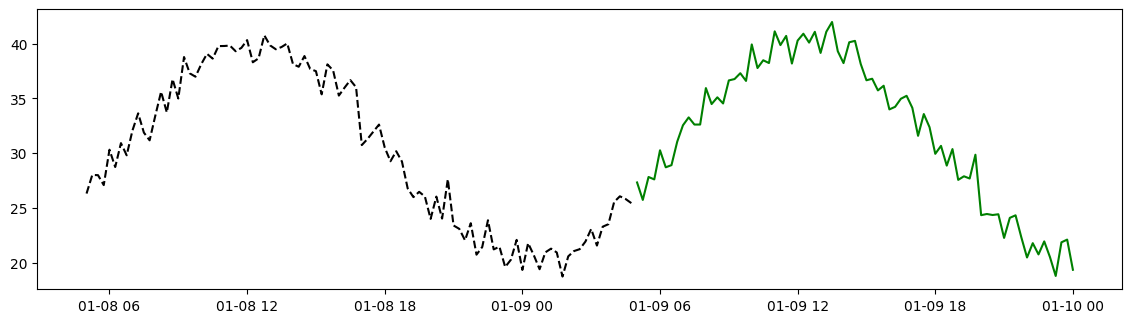

In [215]:
predictions = Y_test  # In practice, this would come from model.predict(X_test)

# Extracting the last N sequences from the training data for plotting
N = len(X_test)  # Number of sequences you're predicting for
time_intervals = pd.date_range(end=df['Timestamp'].iloc[-1], periods=N + time_steps, freq='15min')[:-time_steps]  # Adjust the freq if needed

# Original series (using temperature as an example)
original_temperature = df['Temperature (°C)'].iloc[-(N + time_steps):-time_steps].values

# Splitting the predictions into temperature and moisture
predicted_temperature = predictions[:, 0]  # Assuming temperature is the first column
predicted_moisture = predictions[:, 1]    # Assuming moisture is the second column

plt.figure(figsize=(14, 8))

# Temperature Plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(time_intervals[:time_steps], original_temperature[:time_steps], 'k--', label='Used Sequence')
plt.plot(time_intervals[time_steps:], original_temperature[time_steps:], 'g-', label='Actual Temperature')
plt.plot(time_intervals[time_steps:], predicted_temperature, 'r-', label='Predicted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast Validation')
plt.legend()

# Moisture Plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
# For moisture, we only plot predictions as an example
plt.plot(time_intervals[time_steps:], predicted_moisture, 'b-', label='Predicted Moisture')
plt.xlabel('Time')
plt.ylabel('Moisture (%)')
plt.title('Moisture Forecast Validation')
plt.legend()

plt.tight_layout()
plt.show()
